In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans

import wrangle
import env

seed =21

# Using the mall_customers dataset

In [2]:
url = env.get_connection('mall_customers')
query = 'select * from customers'
df = pd.read_sql(query,url)

In [34]:
train, X_train, y_train, X_val, y_val, X_test, y_test = wrangle.split_data(df,'gender')

In [4]:
inertia = [] 
for k in range(1,11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X_train[['annual_income','spending_score']])
    inertia.append(kmeans.inertia_)


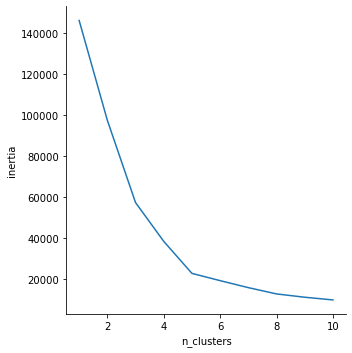

In [5]:
sns.relplot(data=pd.DataFrame({'n_clusters':list(range(1,11)),'inertia':inertia}),x='n_clusters',y='inertia',kind='line')

n_clusters = 5 has the largest acute angle

In [6]:
clusts = X_train[['annual_income','spending_score']]

In [7]:
kmeans = KMeans(n_clusters=5,random_state=seed)
kmeans.fit(X_train[['annual_income','spending_score']])
clusts['unscaled_clust'] = kmeans.predict(X_train[['annual_income','spending_score']])

/var/folders/fz/0282wvb93rn0lm_p0nscw1sm0000gn/T/ipykernel_2519/2608176801.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clusts['unscaled_clust'] = kmeans.predict(X_train[['annual_income','spending_score']])


In [8]:
X_train,X_val,X_test = wrangle.scale_minmax(X_train,X_val,X_test)

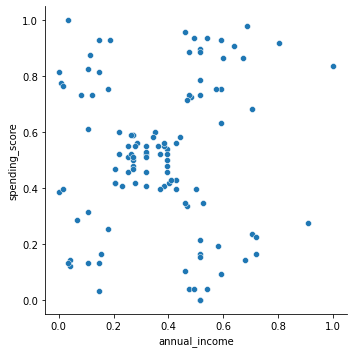

In [9]:
sns.relplot(data=X_train,x='annual_income',y='spending_score')

In [10]:
inertia = []
seed = 21
for k in range(1,10):
    kmeans = KMeans(n_clusters=k, random_state=seed)
    kmeans.fit(X_train[['annual_income','spending_score']])
    inertia.append(kmeans.inertia_)

In [11]:
clust_inert = pd.DataFrame({'n_clusters':list(range(1,10)),'inertia':inertia})

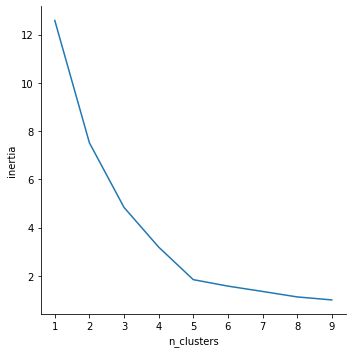

In [12]:
sns.relplot(data=clust_inert,x='n_clusters',y='inertia',kind='line')

Our largest acute angle is at n_clusters = 5

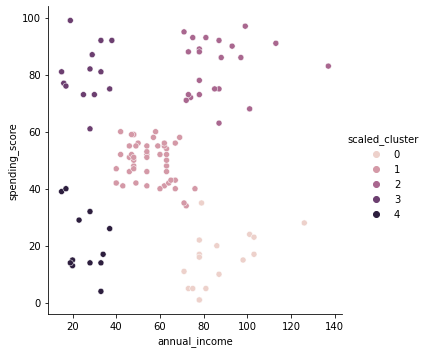

In [45]:
kmeans = KMeans(n_clusters=5, random_state=seed)
kmeans.fit(X_train[['annual_income','spending_score']])
clusts['scaled_cluster'] = kmeans.predict(X_train[['annual_income','spending_score']])
sns.relplot(data=clusts,x='annual_income',y='spending_score',hue='scaled_cluster')

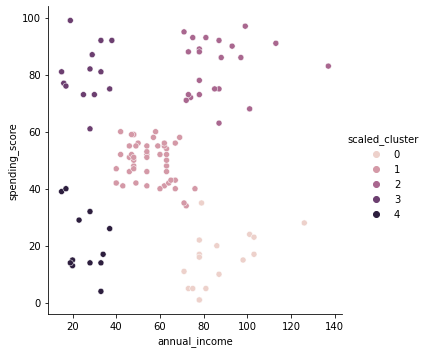

In [43]:
def plot_inertia(df):
    inertia = []
    for k in range(1,10):
        kmeans = KMeans(n_clusters=k, random_state=seed)
        kmeans.fit(df)
        inertia.append(kmeans.inertia_)
    
    clust_inert = pd.DataFrame({'n_clusters':list(range(1,10)),'inertia':inertia})
    
    return sns.relplot(data=clust_inert,x='n_clusters',y='inertia',kind='line')

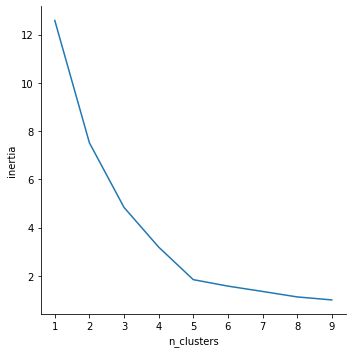

In [42]:
plot_inertia(X_train[['annual_income','spending_score']])

In [21]:
inertia = []
seed = 21
for k in range(1,10):
    kmeans = KMeans(n_clusters=k, random_state=seed)
    kmeans.fit(X_train[['annual_income','spending_score','age']])
    inertia.append(kmeans.inertia_)

In [22]:
clust_inert = pd.DataFrame({'n_clusters':list(range(1,10)),'inertia':inertia})

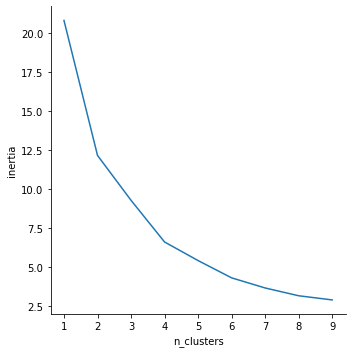

In [23]:
sns.relplot(data=clust_inert,x='n_clusters',y='inertia',kind='line')

Largest acute angle is at n_clusters =4

In [24]:
kmeans = KMeans(n_clusters=5, random_state=seed)
kmeans.fit(X_train[['annual_income','spending_score','age']])
kmeans.predict(X_train[['annual_income','spending_score','age']])

array([2, 1, 4, 2, 2, 1, 1, 3, 1, 1, 1, 1, 0, 2, 3, 1, 3, 2, 1, 1, 3, 0,
       0, 1, 3, 2, 1, 0, 0, 0, 2, 2, 1, 1, 2, 0, 1, 0, 0, 1, 0, 2, 4, 4,
       3, 2, 2, 2, 1, 2, 1, 1, 2, 2, 1, 0, 2, 3, 1, 4, 1, 2, 3, 0, 4, 0,
       4, 1, 2, 2, 3, 4, 3, 3, 4, 1, 4, 4, 4, 4, 1, 4, 4, 0, 4, 4, 1, 4,
       0, 2, 0, 4, 3, 0, 0, 1, 4, 1, 4, 1, 0, 1, 4, 4, 4, 1, 4, 2, 2, 0,
       4, 1], dtype=int32)

### reset my variables

In [36]:
train, X_train, y_train, X_val, y_val, X_test, y_test = wrangle.split_data(df,'gender')

In [37]:
unscaled = X_train[['annual_income','spending_score']]
X_train,X_val,X_test = wrangle.scale_minmax(X_train,X_val,X_test)
scaled = X_train[['annual_income','spending_score']]
unscaled.shape,scaled.shape

((112, 2), (112, 2))

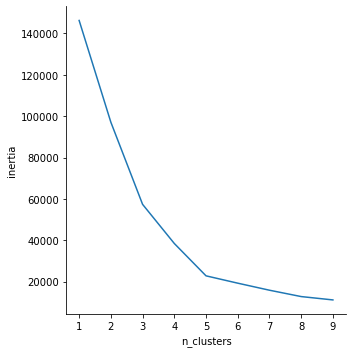

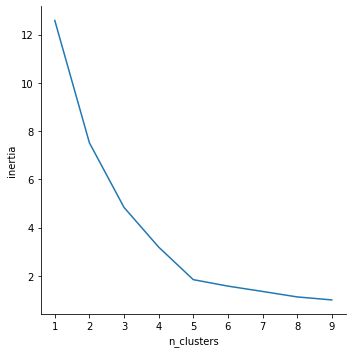

In [40]:
plot_inertia(unscaled)
plot_inertia(scaled)

In [50]:
def plot_kmeans_cluster(df,n):  
    kmeans = KMeans(n_clusters=n, random_state=seed)
    kmeans.fit(df)

    sns.relplot(data=df,x=df.iloc[:,0],y=df.iloc[:,1],hue=pd.Series(kmeans.predict(df)))

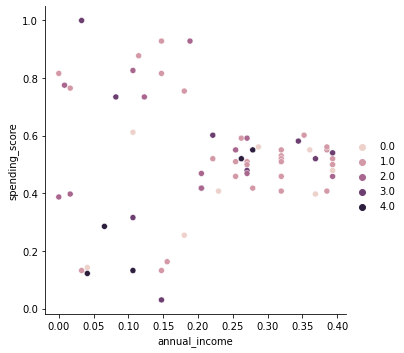

In [51]:
plot_kmeans_cluster(scaled,5)

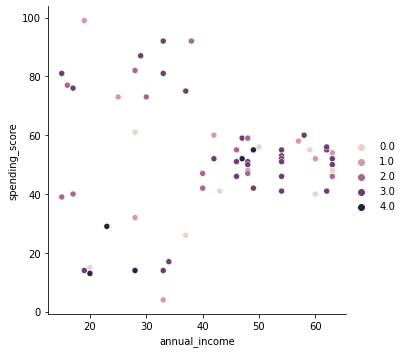

In [52]:
plot_kmeans_cluster(unscaled,5)

I want to start planning better for these exercises. Right now with a haphazard approach my code is everywhere. I think the first step should be reading through all the exercises to see the shape of it. Then plan out what tools I'll need. Then think about the logical progression. What actions will I repeat multiple times? -make a function for it. Have multiple py files for my functions. Acquire doesn't need its own, but maybe combined with cleaning (prepare) would be good. I think that could include include my scaler and splitting. Then a py file for exploration.